# Paper: Data-based analysis, modelling and forecasting of the COVID-19 outbreak

In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

three age groups

C:\Users\kuotuantuan\AppData\Local\Temp\ipykernel_30144\2881520639.py:58: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  ax.grid(b=True, which='major', c='w', lw=2, ls='-')


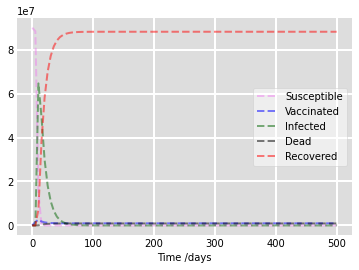

In [2]:
# The SVIDR model differential equations.
def deriv(y, t, age_num,  alpha, beta, sigma, lbda, rho, M):
    S, V, I, D, R = y[0:3], y[3:6], y[6:9], y[9:12], y[12:15]
    dSdt, dVdt, dIdt, dDdt, dRdt = [], [], [], [], []

    for i in range(age_num):
        dSdt.append( - beta/N * S[i] * M[i, :].dot(I) - alpha * S[i] )
        dVdt.append( alpha * S[i] - sigma * beta/N * V[i] * M[i, :].dot(I) )
        dIdt.append( beta/N * S[i] * M[i, :].dot(I) + sigma * beta/N * V[i] * M[i, :].dot(I) - lbda * I[i] - rho * I[i] )
        dDdt.append( lbda * I[i] )
        dRdt.append( rho * I[i] )

    return dSdt + dVdt + dIdt + dDdt + dRdt

age_num = 3

# Initial conditions
N = 3e8

init0 = np.array([[N*0.3, N*0.4, N*0.3],
          [0, 0, 0],
          [1, 1, 1],
          [0, 0, 0],
          [0, 0, 0]])


# A grid of time points (in days)
t = np.linspace(0, 500, 100) 

#parameters
M = np.array([[19.2, 3.7, 1.4],
              [3.7, 13.1, 2.1],
              [1.4, 2.1, 7.2]
            ])
alpha = 3.5e-3
beta = 0.3
sigma = 0.05
lbda = 1e-3
rho = 0.1

# Initial conditions vector
y0 = init0.reshape(15, )
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(age_num, alpha, beta, sigma, lbda, rho, M))
S1, S2, S3, V1, V2, V3, I1, I2, I3, D1, D2, D3, R1, R2, R3 = ret.T

# Plot the data on two separate curves for S(t), I(t)
fig = plt.figure(facecolor='w')
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, S1, 'violet', alpha=0.5, lw=2, label='Susceptible', linestyle='dashed')
ax.plot(t, V1, 'blue', alpha=0.5, lw=2, label='Vaccinated', linestyle='dashed')
ax.plot(t, I1, 'darkgreen', alpha=0.5, lw=2, label='Infected', linestyle='dashed')
ax.plot(t, D1, 'black', alpha=0.5, lw=2, label='Dead', linestyle='dashed')
ax.plot(t, R1, 'red', alpha=0.5, lw=2, label='Recovered', linestyle='dashed')
ax.set_xlabel('Time /days')
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [3]:
#save to csv file
a = np.asarray([t, S1, S2, S3, V1, V2, V3, I1, I2, I3, D1, D2, D3, R1, R2, R3]) 

np.savetxt("svidr_age3_sim.csv", a, delimiter=",")